In [1]:
from ConnectN import ConnectN
from Play import Play
from AlphaZero import AlphaZero
from collections import deque
import torch
import numpy as np
%matplotlib notebook

In [25]:
## set uo ConnectN game
game_setting = {'size':(3,3), 'N':3, 'pie_rule':True}
game = ConnectN(**game_setting)

<IPython.core.display.Javascript object>


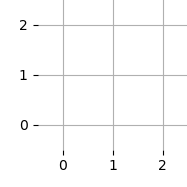

In [26]:
## explore game mechanics
gameplay = Play(
    ConnectN(**game_setting),
    player1=None,
    player2=None
)

<IPython.core.display.Javascript object>


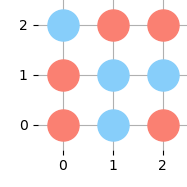

In [29]:
## Game against a random player
game_setting = {'size':(3, 3), 'N':3}
game = ConnectN(**game_setting)
agent = AlphaZero(game_size=(3, 3))

%matplotlib notebook
gameplay = Play(
    game,
    player1=agent.policy_player_mcts,
    player2=None
)

In [9]:
## prepare training parameters
game_setting = {'size':(3,3), 'N':3}
game = ConnectN(**game_setting)
agent = AlphaZero(game_size=(3, 3))


n_episodes = 2000
max_tree_search = 100

loss_per_episode = []
loss_window = deque(maxlen=100)
outcomes = []
outcomes_window = deque(maxlen=10)

for episode in range(n_episodes):
    
    loss, outcome = agent.explore_and_learn(game, max_tree_search)
    
    loss_per_episode.append(loss)
    outcomes.append(outcome)
    loss_window.append(loss)
    outcomes_window.append(outcome)
    
    ## print progress overwriting previous line
    print(f'Episode {episode}/{n_episodes} | Mean Loss {np.mean(loss_window):.2f} | Last 10 Outcomes: {outcomes_window}', end='\r')
        
    if episode % 100 == 0:
        print(f'Episode {episode}/{n_episodes} | Mean Loss {np.mean(loss_window):.2f} | Last 10 Outcomes: {outcomes_window}')
        torch.save(agent.policy.state_dict(), 'policy.pth')
        
print(f'Episode {episode}/{n_episodes} | Mean Loss {np.mean(loss_window):.2f} | Last 10 Outcomes: {outcomes_window}')
torch.save(agent.policy.state_dict(), '3x3_policy.policy')

Episode 0/2000 | Mean Loss 5.09 | Last 10 Outcomes: deque([0], maxlen=10)
Episode 100/2000 | Mean Loss 7.56 | Last 10 Outcomes: deque([0, 1, 0, 0, 1, 1, 0, 0, 0, 0], maxlen=10))
Episode 200/2000 | Mean Loss 4.51 | Last 10 Outcomes: deque([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], maxlen=10))))
Episode 300/2000 | Mean Loss 2.39 | Last 10 Outcomes: deque([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], maxlen=10)))
Episode 400/2000 | Mean Loss 2.40 | Last 10 Outcomes: deque([0, 1, 0, 0, 0, 0, -1, 0, 0, 0], maxlen=10))
Episode 500/2000 | Mean Loss 2.42 | Last 10 Outcomes: deque([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], maxlen=10)))
Episode 600/2000 | Mean Loss 1.49 | Last 10 Outcomes: deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], maxlen=10)))
Episode 700/2000 | Mean Loss 1.91 | Last 10 Outcomes: deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], maxlen=10))
Episode 800/2000 | Mean Loss 1.21 | Last 10 Outcomes: deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], maxlen=10))
Episode 900/2000 | Mean Loss 1.08 | Last 10 Outcomes: deque([0, 0, 0, 0, -1, 0, 0, 0, 0,

In [2]:
game_setting = {'size':(3,3), 'N':3}
game = ConnectN(**game_setting)
agent = AlphaZero(game_size=(3, 3))

In [3]:
## load policy
agent.load_policy("3x3_policy.policy")

<IPython.core.display.Javascript object>


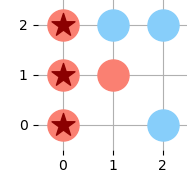

In [8]:
%matplotlib notebook
gameplay = Play(
    game,
    player1=agent.policy_player_mcts,
    player2=None
)